# Project - Brickx Investment Analysis

This project will explore the KPIs of an investment portfolio from the Brickx investment platform. The analysis will investigate the relevant time series of dividend distributed from each property and whether there is a correlation between the average brick (unit) price of a property and the dividend paid to investors each month. This will be accomplished through analysing data from data collected from the Brickx website which has been cleaned through SQLite.

Through this project, the following questions will be explored:

+ What is the distribution of investments into each state for this portfolio?
+ How much rental income was collected from each property?
+ Which property has provided the highest rental yield?
+ Is there a correlation between average brick (unit) price and the average monthly dividend?

**Data sources**

- Brickx data: https://www.brickx.com/properties

- SQLite data cleaning (GitHub): https://github.com/ErictheAnalyst23/DataAnalystPorfolio/blob/main/SQL%20Queries/SP1%3A%20Brickx_SQL_Analysis

## Importing Modules into Jupyter Notebook

To investigate the listed questions for this project, the following modules were imported.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

## Information about the datasets used

Two datasets were used for this project. The original data was cleaned using SQLite. 

The first `csv` file 'BrickxKPIs.csv' provides key metrics about each property in the portfolio, whilst the second file 'BrickxGrowth.csv' provides information regarding any changes over a period of time.  

### Loading the dataset into notebook

'BrickxKPIs.csv' will be read into a DataFrame called df_KPI, followed by a quick inspection of the DataFrame using .head() to check its contents.


In [2]:
df_KPI = pd.read_csv('BrickxKPIs.csv')

In [3]:
df_KPI.head()

,Property,state,suburb,zipcode,total_bricks_purchased,total_purchase_price,avg_purchase_price,total_dividend,total_fees,Total_investment,total_sell_price,total_bricks_sold,avg_sell_price
0,BAN01,Victoria,Ballarat North,3350.0,2.0,69.0,34.50,1.08,0.70,69.0,72.0,2.0,36.0
1,CLN02,Victoria,Clyde North,3978.0,5.0,240.0,48.00,35.85,0.00,240.0,NaN,NaN,NaN
2,DAR01,New South Wales,Darlinghurst,2010.0,10.0,479.0,47.90,11.87,4.83,479.0,490.0,10.0,49.0
3,DAR02,New South Wales,Darlinghurst,2010.0,19.0,1161.0,61.11,29.98,11.76,1161.0,1197.0,19.0,63.0
4,ENM01,New South Wales,Enmore,2042.0,22.0,1455.0,66.14,35.14,14.74,1455.0,1496.0,22.0,68.0


## Check number of rows and columns in 'BrickxKPI' dataset

There is a total of 13 columns in this dataset. 

Column names:
- Property
- state
- suburb
- zipcode
- total_brickx_purchased
- total_purchase_price
- avg_purchase_price
- total_dividend
- total_fees
- Total_investment
- total_sell_price
- total_bricks_sold
- avg_sell_price

In [4]:
print(df_KPI.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property                14 non-null     object 
 1   state                   14 non-null     object 
 2   suburb                  14 non-null     object 
 3   zipcode                 14 non-null     float64
 4   total_bricks_purchased  14 non-null     float64
 5   total_purchase_price    14 non-null     float64
 6   avg_purchase_price      14 non-null     float64
 7   total_dividend          15 non-null     float64
 8   total_fees              14 non-null     float64
 9   Total_investment        14 non-null     float64
 10  total_sell_price        10 non-null     float64
 11  total_bricks_sold       10 non-null     float64
 12  avg_sell_price          10 non-null     float64
dtypes: float64(10), object(3)
memory usage: 1.8+ KB
None


#### Notes:

Zipcode and total_bricks_purchased are floats in this dataset. These will be converted into integers as they only exist as whole numbers.

## Check for any null values

It can be observed that the columns 'total_sell_price', 'total_bricks_sold' and 'avg_sell_price' have null values which is understandable as these properties have not been sold from the portfolio. However, let's check if there are null values in any other columns.

#### Quick summary

It can be observed there are two properties with 'null' values, they also don't have a relevant state, suburb or zipcode attached to it. This would imply these are not part of the portfolio and can be removed from the dataset.

#### Change to column names into lower cases

Columns 'Property' and 'Total_investment' both start with upper case whilst the rest start with a lower case. For simplity of later analysis, the two columns will be converted into lower cases.

In [5]:
df_KPI.isnull().sum()

Property                  2
state                     2
suburb                    2
zipcode                   2
total_bricks_purchased    2
total_purchase_price      2
avg_purchase_price        2
total_dividend            1
total_fees                2
Total_investment          2
total_sell_price          6
total_bricks_sold         6
avg_sell_price            6
dtype: int64

In [6]:
df_KPI = df_KPI.rename(columns = str.lower) 

df_KPI

,property,state,suburb,zipcode,total_bricks_purchased,total_purchase_price,avg_purchase_price,total_dividend,total_fees,total_investment,total_sell_price,total_bricks_sold,avg_sell_price
0,BAN01,Victoria,Ballarat North,3350.0,2.0,69.0,34.50,1.08,0.70,69.0,72.0,2.0,36.0
1,CLN02,Victoria,Clyde North,3978.0,5.0,240.0,48.00,35.85,0.00,240.0,NaN,NaN,NaN
2,DAR01,New South Wales,Darlinghurst,2010.0,10.0,479.0,47.90,11.87,4.83,479.0,490.0,10.0,49.0
3,DAR02,New South Wales,Darlinghurst,2010.0,19.0,1161.0,61.11,29.98,11.76,1161.0,1197.0,19.0,63.0
4,ENM01,New South Wales,Enmore,2042.0,22.0,1455.0,66.14,35.14,14.74,1455.0,1496.0,22.0,68.0
5,KGT01,Western Australia,Kensington (Perth),6151.0,1.0,80.0,80.00,0.12,0.81,80.0,82.0,1.0,82.0
6,KIN01,South Australia,Kingswood (Adelaide),5062.0,3.0,144.0,48.00,3.15,1.45,144.0,147.0,3.0,49.0
7,MOS01,New South Wales,Mosman,2088.0,5.0,775.0,155.00,3.65,7.92,775.0,810.0,5.0,162.0
8,NML01,Victoria,North Melbourne,3051.0,4.0,416.0,104.00,31.04,0.00,416.0,NaN,NaN,NaN
9,PPT01,New South Wales,Potts Point,2011.0,23.0,1197.0,52.04,24.37,12.50,1197.0,1311.0,23.0,57.0


# Drop Null Values and Convert Data Types

Any rows with null values for the 'property' column is not apart of the investment portfolio and should therefore be dropped from the analysis.

In [7]:
df_KPI = df_KPI.dropna(subset =['property'])

df_KPI

,property,state,suburb,zipcode,total_bricks_purchased,total_purchase_price,avg_purchase_price,total_dividend,total_fees,total_investment,total_sell_price,total_bricks_sold,avg_sell_price
0,BAN01,Victoria,Ballarat North,3350.0,2.0,69.0,34.50,1.08,0.70,69.0,72.0,2.0,36.0
1,CLN02,Victoria,Clyde North,3978.0,5.0,240.0,48.00,35.85,0.00,240.0,NaN,NaN,NaN
2,DAR01,New South Wales,Darlinghurst,2010.0,10.0,479.0,47.90,11.87,4.83,479.0,490.0,10.0,49.0
3,DAR02,New South Wales,Darlinghurst,2010.0,19.0,1161.0,61.11,29.98,11.76,1161.0,1197.0,19.0,63.0
4,ENM01,New South Wales,Enmore,2042.0,22.0,1455.0,66.14,35.14,14.74,1455.0,1496.0,22.0,68.0
5,KGT01,Western Australia,Kensington (Perth),6151.0,1.0,80.0,80.00,0.12,0.81,80.0,82.0,1.0,82.0
6,KIN01,South Australia,Kingswood (Adelaide),5062.0,3.0,144.0,48.00,3.15,1.45,144.0,147.0,3.0,49.0
7,MOS01,New South Wales,Mosman,2088.0,5.0,775.0,155.00,3.65,7.92,775.0,810.0,5.0,162.0
8,NML01,Victoria,North Melbourne,3051.0,4.0,416.0,104.00,31.04,0.00,416.0,NaN,NaN,NaN
9,PPT01,New South Wales,Potts Point,2011.0,23.0,1197.0,52.04,24.37,12.50,1197.0,1311.0,23.0,57.0


In [8]:
df_KPI['zipcode'] = df_KPI['zipcode'].astype(int)

df_KPI['total_bricks_purchased'] = df_KPI['total_bricks_purchased'].astype(int)

/tmp/ipykernel_58803/488976576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KPI['zipcode'] = df_KPI['zipcode'].astype(int)
/tmp/ipykernel_58803/488976576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KPI['total_bricks_purchased'] = df_KPI['total_bricks_purchased'].astype(int)


In [9]:
df_KPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property                14 non-null     object 
 1   state                   14 non-null     object 
 2   suburb                  14 non-null     object 
 3   zipcode                 14 non-null     int64  
 4   total_bricks_purchased  14 non-null     int64  
 5   total_purchase_price    14 non-null     float64
 6   avg_purchase_price      14 non-null     float64
 7   total_dividend          14 non-null     float64
 8   total_fees              14 non-null     float64
 9   total_investment        14 non-null     float64
 10  total_sell_price        10 non-null     float64
 11  total_bricks_sold       10 non-null     float64
 12  avg_sell_price          10 non-null     float64
dtypes: float64(8), int64(2), object(3)
memory usage: 1.5+ KB


# Exploration of the dataset

### What are the unique properties in this investment portfolio?


In [10]:
unique_property = df_KPI.property.unique()

print('The names of the properties invested in this portfolio is ' + str(unique_property) + '.')

num_unique_property = df_KPI.property.nunique()

print('The number of unique properties in this portfolio is: ' + str(num_unique_property) + '.')

The names of the properties invested in this portfolio is ['BAN01' 'CLN02' 'DAR01' 'DAR02' 'ENM01' 'KGT01' 'KIN01' 'MOS01' 'NML01'
 'PPT01' 'PRA01' 'SOM01' 'SUR01' 'TAR01'].
The number of unique properties in this portfolio is: 14.


In [11]:
# Summary statistics of the dataset

df_KPI.describe()

,zipcode,total_bricks_purchased,total_purchase_price,avg_purchase_price,total_dividend,total_fees,total_investment,total_sell_price,total_bricks_sold,avg_sell_price
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,10.00000,10.00000,10.00000
mean,3147.500000,8.857143,598.285714,72.036429,17.416429,5.190000,598.285714,684.00000,9.90000,75.30000
std,1287.028704,7.378317,449.751971,32.529682,14.661505,4.968587,449.751971,517.46476,8.42549,37.08264
min,2010.000000,1.000000,69.000000,34.500000,0.120000,0.000000,69.000000,72.00000,1.00000,36.00000
25%,2018.750000,4.250000,236.250000,48.000000,3.275000,0.900000,236.250000,232.75000,3.50000,51.00000
50%,3116.000000,5.000000,508.500000,63.625000,18.120000,4.780000,508.500000,617.50000,7.00000,65.50000
75%,3771.500000,10.750000,903.250000,84.500000,30.775000,7.580000,903.250000,1100.25000,16.75000,80.25000
max,6151.000000,23.000000,1455.000000,155.000000,35.850000,14.740000,1455.000000,1496.00000,23.00000,162.00000


### First Question: What is the distribution of investments for each state?

Why this question was asked:
- To examine the level of diversification in this portfolio and to ensure its not heavily focused on a particular state; a similar step will be taken when looking at individual properties.

How will this be completed:
- Using the groupby statement and adding the total purchase prices together.   

In [12]:
amount_invested_prop = df_KPI.groupby('property').total_purchase_price.max().sort_values(ascending=False).reset_index()

amount_invested_prop.columns = ['property', 'total_purchase_price']

print(amount_invested_prop)

   property  total_purchase_price
0     ENM01                1455.0
1     PPT01                1197.0
2     DAR02                1161.0
3     SOM01                 946.0
4     MOS01                 775.0
5     SUR01                 641.0
6     PRA01                 538.0
7     DAR01                 479.0
8     NML01                 416.0
9     CLN02                 240.0
10    TAR01                 235.0
11    KIN01                 144.0
12    KGT01                  80.0
13    BAN01                  69.0


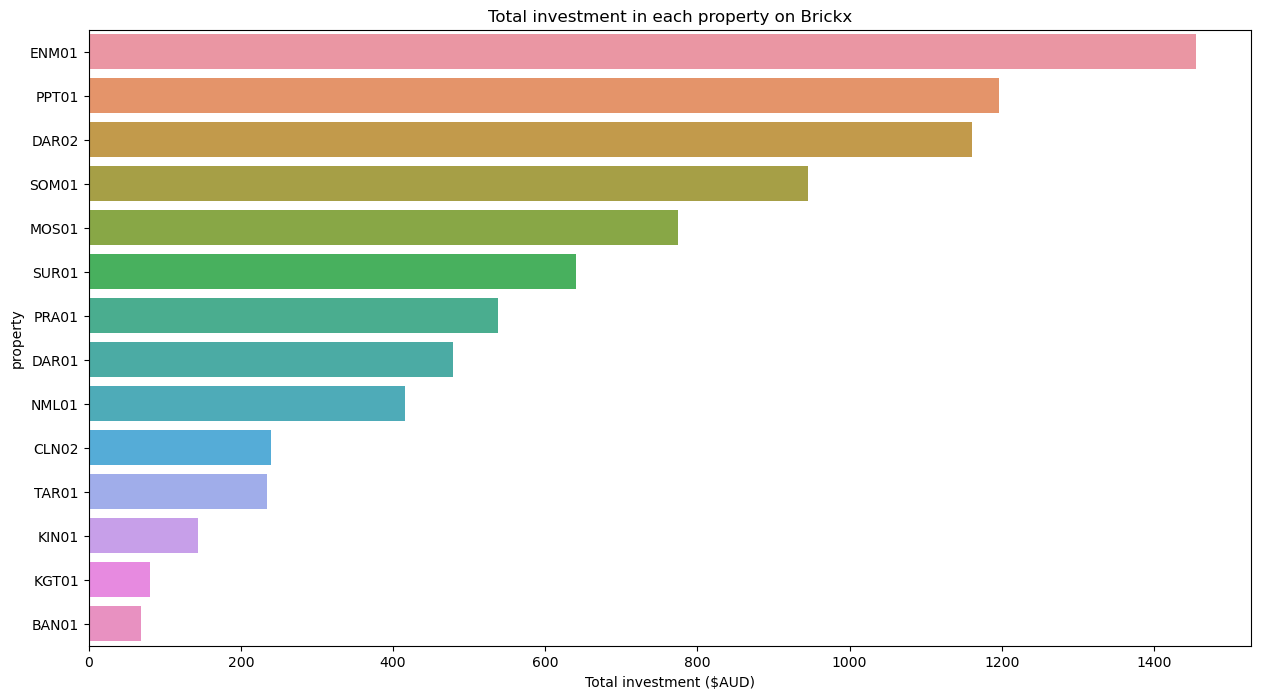

In [13]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'total_purchase_price', y = 'property', data = amount_invested_prop)
plt.title('Total investment in each property on Brickx')
plt.xlabel('Total investment ($AUD)')
plt.show()
plt.close()

In [14]:
amount_invested_state = df_KPI.groupby('state').total_purchase_price.sum().sort_values(ascending=False).reset_index()

amount_invested_state.columns = ['state', 'total_purchase_price']

print(amount_invested_state)

               state  total_purchase_price
0    New South Wales                5708.0
1           Victoria                2444.0
2    South Australia                 144.0
3  Western Australia                  80.0


### Summary for question

The results show the portfolio has heavily favoured properties in New South Wales with Victoria having less than half the amount (NSW: $5708 |VIC: $2444). Overall, this portfolio is overly exposed in New South Wales with very little exposure placed into properties in South and Western Australia. Therefore, it might be worthwhile to look at diversifying into properties outside of New South Wales.

Let's also explore whether a particular property within each state is properly diversified.

In [15]:
propertystate = df_KPI.groupby(['state', 'property']).total_purchase_price.sum().unstack()

propertystate

property,BAN01,CLN02,DAR01,DAR02,ENM01,KGT01,KIN01,MOS01,NML01,PPT01,PRA01,SOM01,SUR01,TAR01
state,,,,,,,,,,,,,,
New South Wales,NaN,NaN,479.0,1161.0,1455.0,NaN,NaN,775.0,NaN,1197.0,NaN,NaN,641.0,NaN
South Australia,NaN,NaN,NaN,NaN,NaN,NaN,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Victoria,69.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,416.0,NaN,538.0,946.0,NaN,235.0
Western Australia,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


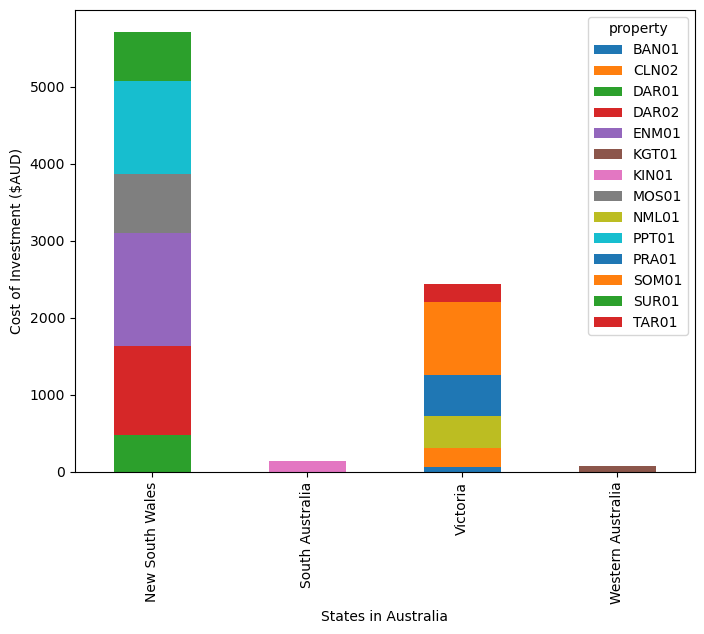

In [16]:
ax = propertystate.plot(kind = 'bar', figsize = (8,6), stacked = True)

ax.set_xlabel('States in Australia')

ax.set_ylabel('Cost of Investment ($AUD)')

plt.show()

### Summary for question

Whilst the portfolio has a larger exposure in New South Wales and Victoria, the stacked bar chart also shows us within these states the portfolio is much more diversified. 


# Second Question: Which property provided the highest rental income?

In [17]:
dividend_prop = df_KPI.groupby('property').total_dividend.max().sort_values(ascending=False).reset_index()

dividend_prop.columns = ['property', 'total_dividend_collected']

print(dividend_prop)

   property  total_dividend_collected
0     CLN02                     35.85
1     ENM01                     35.14
2     TAR01                     33.35
3     NML01                     31.04
4     DAR02                     29.98
5     SUR01                     27.64
6     PPT01                     24.37
7     DAR01                     11.87
8     SOM01                      4.21
9     MOS01                      3.65
10    KIN01                      3.15
11    PRA01                      2.38
12    BAN01                      1.08
13    KGT01                      0.12


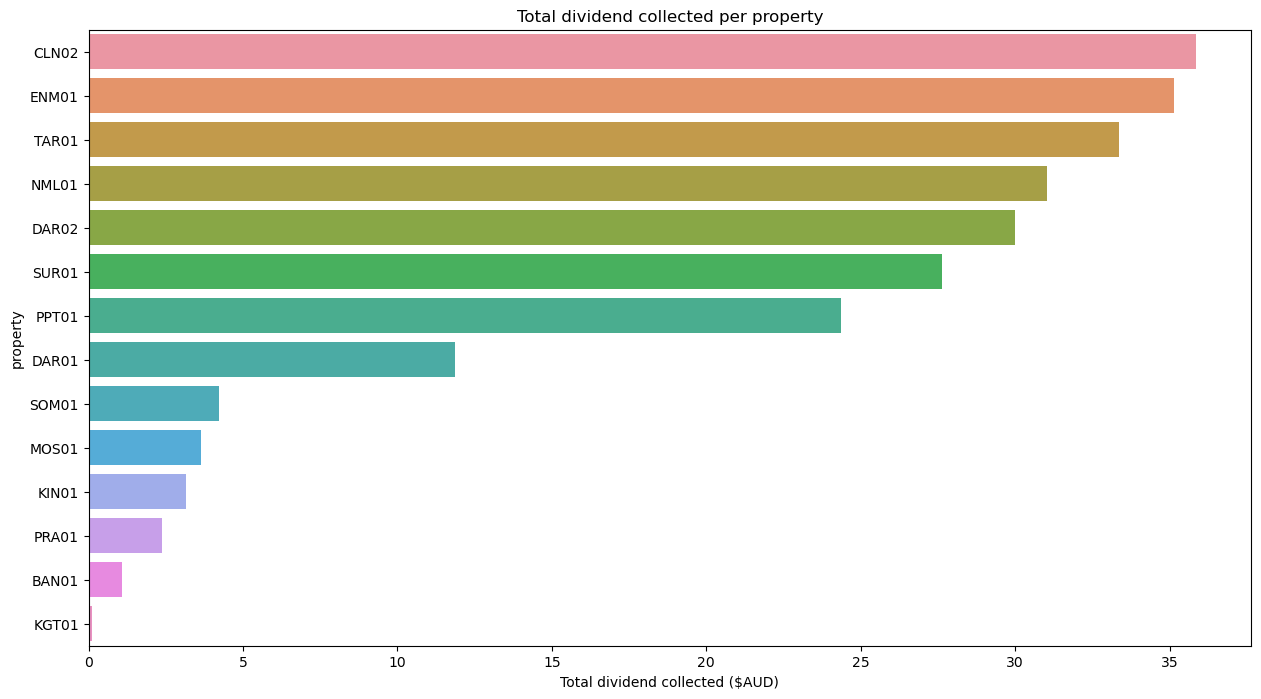

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'total_dividend_collected', y = 'property', data = dividend_prop)
plt.title('Total dividend collected per property')
plt.xlabel('Total dividend collected ($AUD)')
plt.show()
plt.clf()

### Summary for question

CLN02 provided the highest amount of dividend for this portfolio even though it was ranked 10th in total amount invested. This would indicate that the property had a high rental yield and/or held within the portfolio longer compared to the other properties. Hence, in the next section, we will explore the average rental yield of each property to see which would be the best for distribution purposes. 

# Loading the dataset into notebook (BrickxGrowth)

'BrickxGrowth.csv' will be read into a DataFrame called df_Growth, followed by a quick inspection of the DataFrame using .head() to check its contents.

In [19]:
df_Growth = pd.read_csv('BrickxGrowth.csv')

df_Growth.head()

,Property,Date,total_bricks,Dividend_month,Dividend_per_brick_month,Running_dividend_avg,Running_total_dividend,month_held,Investment_in_month,Dividend_month_per_brick
0,BAN01,2019-07-11,1,0.04,0.04,0.040,0.04,1,35,0.04
1,BAN01,2019-08-12,1,0.03,0.03,0.035,0.07,2,35,0.03
2,BAN01,2019-09-12,1,0.04,0.04,0.037,0.11,3,35,0.04
3,BAN01,2019-10-11,1,0.03,0.03,0.035,0.14,4,35,0.03
4,BAN01,2019-11-12,1,0.04,0.04,0.036,0.18,5,35,0.04


## Check for any null values

It can be observed that the columns 'total_sell_price', 'total_bricks_sold' and 'avg_sell_price' have null values which is understandable as these properties have not been sold from the portfolio. However, let's check if there are null values in any other columns.



In [20]:
df_Growth.isnull().sum()

Property                    0
Date                        0
total_bricks                0
Dividend_month              0
Dividend_per_brick_month    0
Running_dividend_avg        0
Running_total_dividend      0
month_held                  0
Investment_in_month         0
Dividend_month_per_brick    0
dtype: int64

In [21]:
df_Growth = df_Growth.rename(columns = str.lower) 

df_Growth.head()

,property,date,total_bricks,dividend_month,dividend_per_brick_month,running_dividend_avg,running_total_dividend,month_held,investment_in_month,dividend_month_per_brick
0,BAN01,2019-07-11,1,0.04,0.04,0.040,0.04,1,35,0.04
1,BAN01,2019-08-12,1,0.03,0.03,0.035,0.07,2,35,0.03
2,BAN01,2019-09-12,1,0.04,0.04,0.037,0.11,3,35,0.04
3,BAN01,2019-10-11,1,0.03,0.03,0.035,0.14,4,35,0.03
4,BAN01,2019-11-12,1,0.04,0.04,0.036,0.18,5,35,0.04


## Explore for any changes in monthly dividend from each property

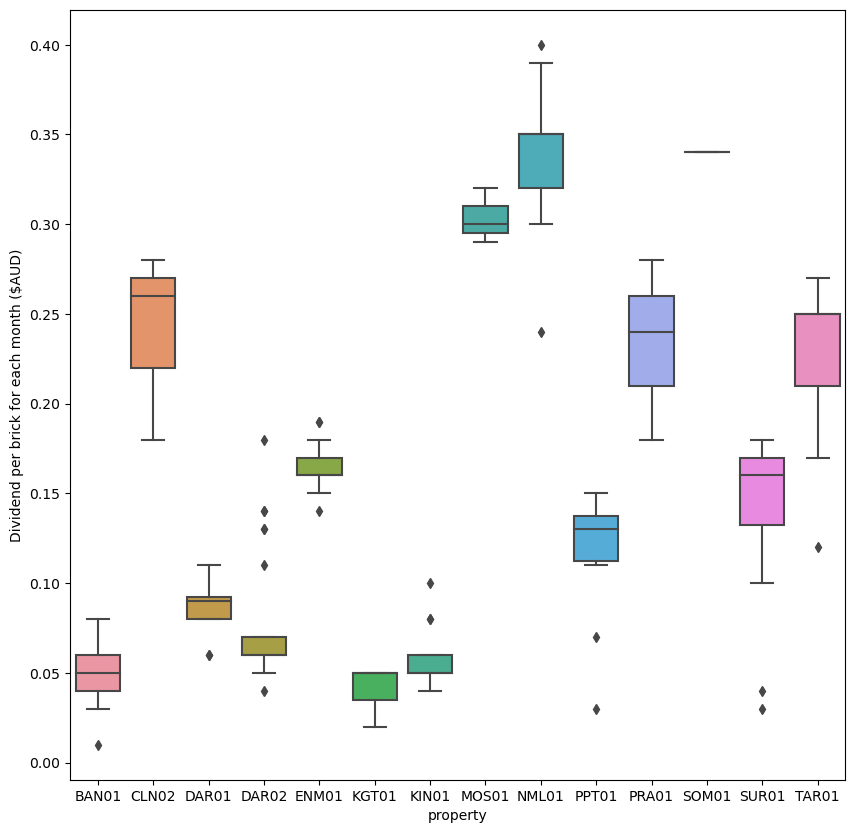

In [22]:
# Boxplot to examine the dividend per individual brick
plt.figure(figsize = (10, 10))
sns.boxplot(x = "property", y = 'dividend_per_brick_month', data = df_Growth)
plt.ylabel('Dividend per brick for each month ($AUD)')
plt.show()


#### NOTE

The box plot shows there have been some fluctuations in the dividend distributed by each property. Some potential reasons for this is likely due repair works for the individual property and the increases in cash rate. 

#### To track the changes in dividend per brick (unit) for each month it was held

A line plot is used to track changes in monthly dividend for an individual unit for each property. The values of months held corresponds to the length of time the property was in the investor's portfolio (It does not reflect the same period of time). 

It can be seen there have been fluctuations in the dividend of each property. Certain properties that were held during the RBA's cash rate increases has seen the 'geared' properties reduce its rental income per unit.

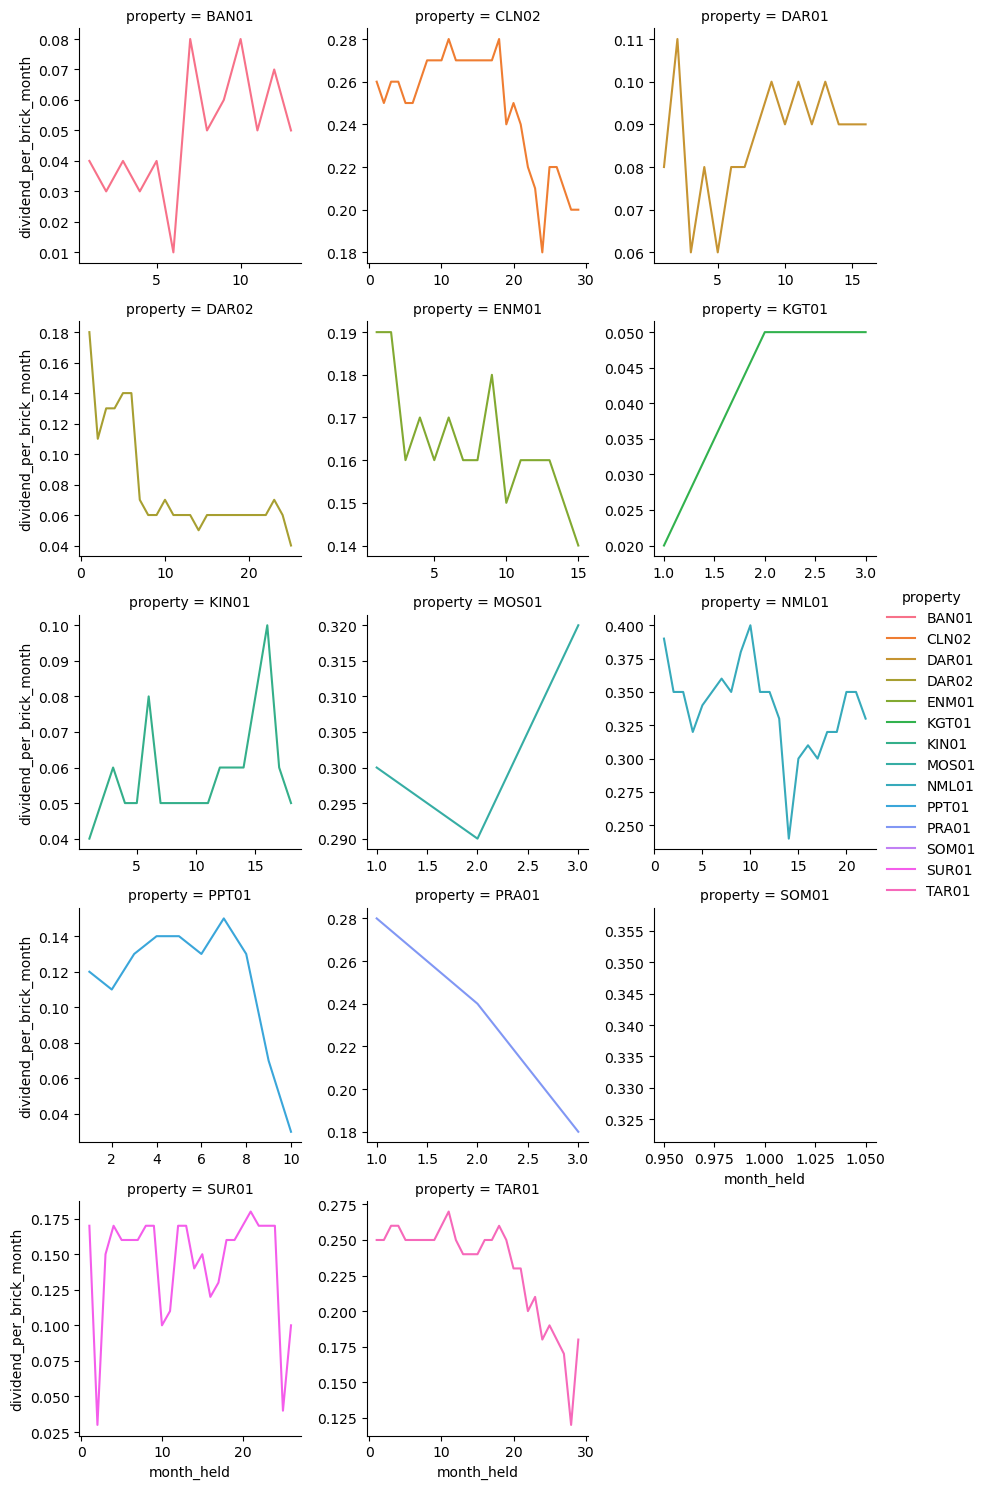

In [23]:
graph_dividend = sns.FacetGrid(df_Growth, col="property", col_wrap=3,
                      hue = "property", sharey = False, sharex = False)

graph_dividend = (graph_dividend.map(sns.lineplot, 'month_held', 'dividend_per_brick_month')
         .add_legend()
         .set_axis_labels("month_held","dividend_per_brick_month"));

#### NOTE

The line plot demonstrates that TAR01 (29 months) was held the longest followed by CLN02 (28 months) which may explain why CLN02 has provided the highest amount of dividend for this portfolio. 

The graphs also indicate that majority of the distributions have remained relatively unchanged; however, some properties have also seen significant decreases in the rental income provided.

# Find the changes in rental yield of the portfolio

When it comes to property investment, monetary gain can be achieved through either capital gains or rental income.

In [24]:
df_merged = df_KPI.merge(df_Growth, on='property', how='inner')

df_merged.head()

,property,state,suburb,zipcode,total_bricks_purchased,total_purchase_price,avg_purchase_price,total_dividend,total_fees,total_investment,...,avg_sell_price,date,total_bricks,dividend_month,dividend_per_brick_month,running_dividend_avg,running_total_dividend,month_held,investment_in_month,dividend_month_per_brick
0,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.7,69.0,...,36.0,2019-07-11,1,0.04,0.04,0.040,0.04,1,35,0.04
1,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.7,69.0,...,36.0,2019-08-12,1,0.03,0.03,0.035,0.07,2,35,0.03
2,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.7,69.0,...,36.0,2019-09-12,1,0.04,0.04,0.037,0.11,3,35,0.04
3,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.7,69.0,...,36.0,2019-10-11,1,0.03,0.03,0.035,0.14,4,35,0.03
4,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.7,69.0,...,36.0,2019-11-12,1,0.04,0.04,0.036,0.18,5,35,0.04


In [25]:
df_merged['annual_dividend'] = round(((df_merged['dividend_per_brick_month']/df_merged['avg_purchase_price'])*12)*100, 2)

df_merged['month_year'] = pd.to_datetime(df_merged['date']).dt.strftime('%m-%Y')

df_merged

,property,state,suburb,zipcode,total_bricks_purchased,total_purchase_price,avg_purchase_price,total_dividend,total_fees,total_investment,...,total_bricks,dividend_month,dividend_per_brick_month,running_dividend_avg,running_total_dividend,month_held,investment_in_month,dividend_month_per_brick,annual_dividend,month_year
0,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.70,69.0,...,1,0.04,0.04,0.040,0.04,1,35,0.04,1.39,07-2019
1,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.70,69.0,...,1,0.03,0.03,0.035,0.07,2,35,0.03,1.04,08-2019
2,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.70,69.0,...,1,0.04,0.04,0.037,0.11,3,35,0.04,1.39,09-2019
3,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.70,69.0,...,1,0.03,0.03,0.035,0.14,4,35,0.03,1.04,10-2019
4,BAN01,Victoria,Ballarat North,3350,2,69.0,34.5,1.08,0.70,69.0,...,1,0.04,0.04,0.036,0.18,5,35,0.04,1.39,11-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,TAR01,Victoria,Tarneit,3209,5,235.0,47.0,33.35,1.17,235.0,...,5,0.95,0.19,1.204,30.10,25,235,0.19,4.85,01-2023
209,TAR01,Victoria,Tarneit,3209,5,235.0,47.0,33.35,1.17,235.0,...,5,0.90,0.18,1.192,31.00,26,235,0.18,4.60,02-2023
210,TAR01,Victoria,Tarneit,3209,5,235.0,47.0,33.35,1.17,235.0,...,5,0.85,0.17,1.180,31.85,27,235,0.17,4.34,03-2023
211,TAR01,Victoria,Tarneit,3209,5,235.0,47.0,33.35,1.17,235.0,...,5,0.60,0.12,1.159,32.45,28,235,0.12,3.06,04-2023


In [26]:
r_yield = df_merged.groupby(['state', 'property']).annual_dividend.mean().sort_values(ascending=False).reset_index()

r_yield

,state,property,annual_dividend
0,Victoria,CLN02,6.181034
1,Victoria,TAR01,5.871724
2,Victoria,SOM01,4.740000
3,Victoria,NML01,3.902273
4,New South Wales,ENM01,2.974000
5,New South Wales,PPT01,2.653000
6,Victoria,PRA01,2.603333
7,New South Wales,SUR01,2.428846
8,New South Wales,MOS01,2.350000
9,New South Wales,DAR01,2.174375


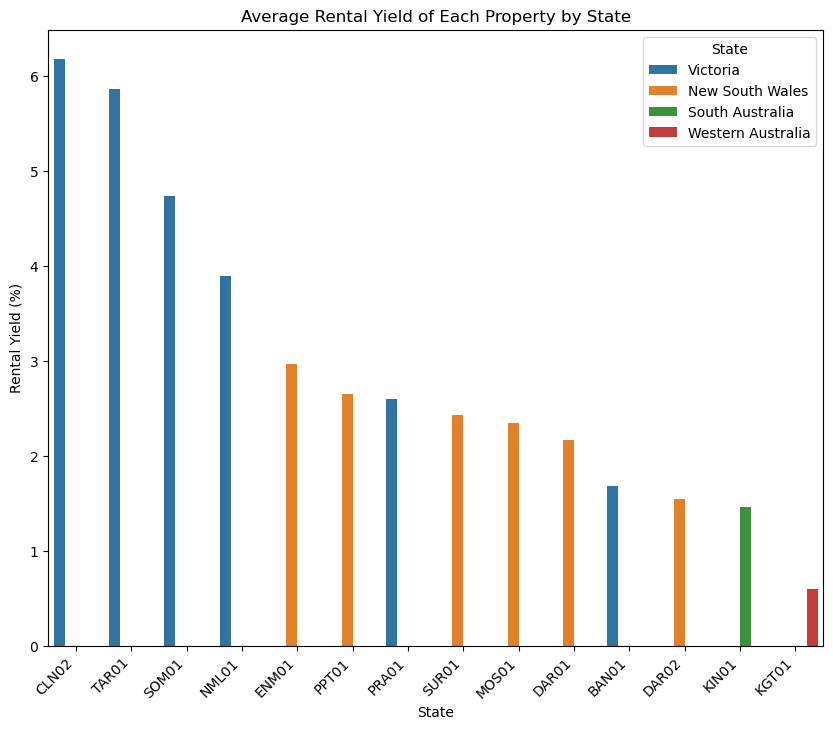

<Figure size 640x480 with 0 Axes>

In [27]:
r_yield = df_merged.groupby(['state', 'property']).annual_dividend.mean().sort_values(ascending=False).reset_index()

r_yield

# Bar plot to show the average annual dividend yield

plt.figure(figsize = (10,8))
sns.barplot(data = r_yield, x = 'property', y = 'annual_dividend', hue = 'state')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Average Rental Yield of Each Property by State')
plt.ylabel('Rental Yield (%)')
plt.xlabel('State')
plt.xticks(rotation=45, horizontalalignment = 'right')
plt.legend(title='State')
plt.show()
plt.clf()



### Summary for Question: Finding the top 5 properties in providing rental yield

Through the groupby statement, we calculated the property with the highest rental yields from this Brickx portfolio. A bar chart was also used to visualise which states in Australia were these high rental yield properties from and found the properties in Victoria provided the highest average rental yield. 

The top 5 highest rental yield properties in this portfolio is:
+ CLN02 (Victoria) - 6.18%
+ TAR01 (Victoria) - 5.87%
+ SOM01 (Victoria) - 4.74%
+ NML01 (Victoria) - 3.90%
+ ENM01 (New South Wales) - 2.97%


#### Tracking the changes in rental yield of the portfolio

In [28]:
yield_change = df_merged[['property','state', 'date','annual_dividend','running_total_dividend', 'month_year']]

yield_change.groupby('date')

yield_change


,property,state,date,annual_dividend,running_total_dividend,month_year
0,BAN01,Victoria,2019-07-11,1.39,0.04,07-2019
1,BAN01,Victoria,2019-08-12,1.04,0.07,08-2019
2,BAN01,Victoria,2019-09-12,1.39,0.11,09-2019
3,BAN01,Victoria,2019-10-11,1.04,0.14,10-2019
4,BAN01,Victoria,2019-11-12,1.39,0.18,11-2019
...,...,...,...,...,...,...
208,TAR01,Victoria,2023-01-16,4.85,30.10,01-2023
209,TAR01,Victoria,2023-02-09,4.60,31.00,02-2023
210,TAR01,Victoria,2023-03-10,4.34,31.85,03-2023
211,TAR01,Victoria,2023-04-13,3.06,32.45,04-2023


/tmp/ipykernel_58803/512616859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_change['date'] = pd.to_datetime(yield_change['date'])


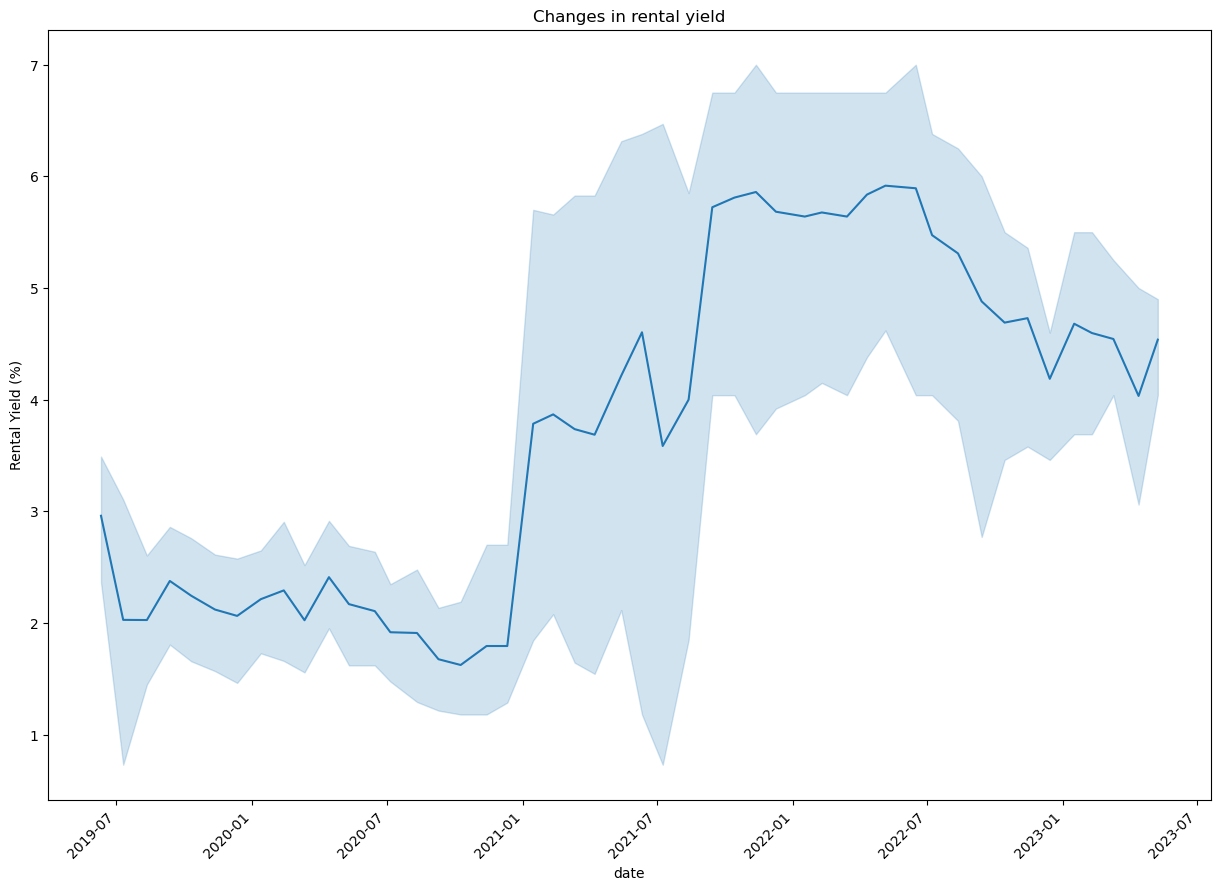

<Figure size 640x480 with 0 Axes>

In [29]:
# Convert 'date' column to datetime data type
yield_change['date'] = pd.to_datetime(yield_change['date'])

plt.figure(figsize=(15,10))

sns.lineplot(x = yield_change['date'], y = yield_change['annual_dividend'])
plt.title('Changes in rental yield')
plt.ylabel('Rental Yield (%)')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()
plt.clf()

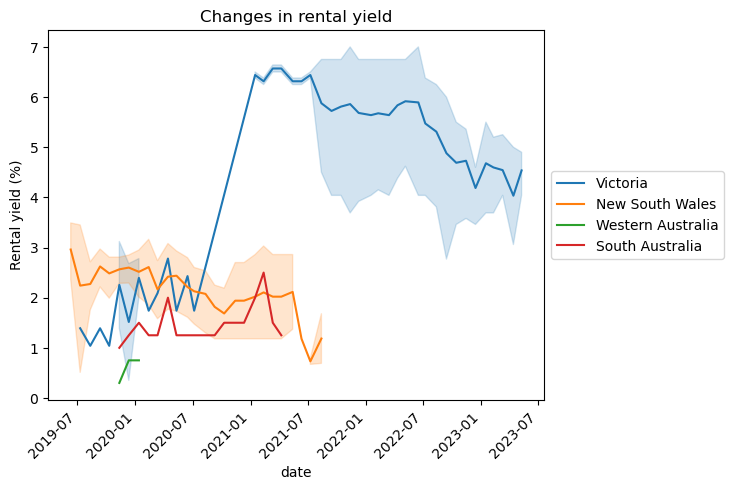

<Figure size 640x480 with 0 Axes>

In [30]:
# Convert 'date' column to datetime data type
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Changes in rental yield for each state

sns.lineplot(data = df_merged, x = 'date', y = 'annual_dividend', hue = 'state')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Changes in rental yield')
plt.ylabel('Rental yield (%)')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()
plt.clf()



<Figure size 1500x1000 with 0 Axes>

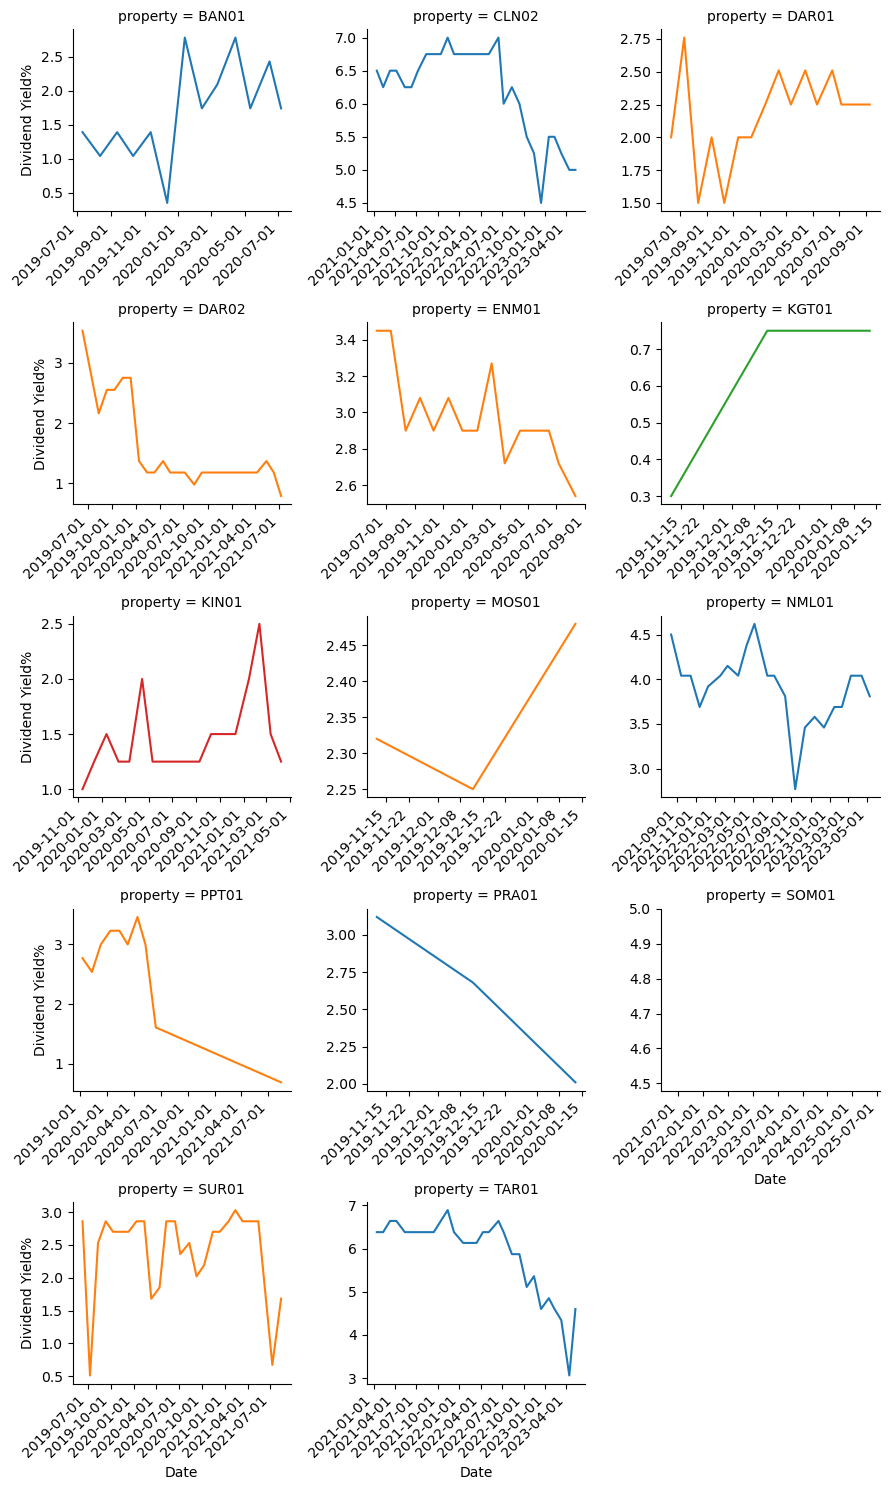

In [32]:
plt.figure(figsize=(15,10))

graph_dividend1 = sns.FacetGrid(df_merged, col="property", col_wrap=3,
                               hue="state", sharey=False, sharex=False)

graph_dividend1 = (graph_dividend1.map(sns.lineplot, 'date', 'annual_dividend')
                  .set_axis_labels("Date", "Dividend Yield%")).set_xticklabels(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

### Additional Notes for Question: Finding the top 5 properties in providing rental yield

The current portfolio contains only properties in Victoria. Whilst the average rental yield for the Victorian based properties are higher than the other states, since April-2022, the line plots shows a continual decrease in the rental yield as a consequence of the interest rate hikes. This negatively affects the investor's returns as majority of these properties are negatively geared and with interest rate hikes, the distribution to the investor is reduce as the repayment of interest has increased.

## Fourth Question: Is there a correlation between average unit price and dividend distribution?

Purpose:
To identify whether purchasing higher priced units will lead to greater dividend distribution. This will be achievd by graphing scatterplots of the two variables.

A scatter plot was used for this section to identify whether there was a correlation between the average unit purchase price of each property and the monthly dividend from that property.

In [33]:
corr_d_p = df_merged.groupby(['property', 'state', 'avg_purchase_price']).dividend_per_brick_month.mean().sort_values(ascending=False).reset_index()

corr_d_p.columns = ['property', 'state', 'avg_purchase_price', 'dividend_per_brick_month']

print(corr_d_p)

   property              state  avg_purchase_price  dividend_per_brick_month
0     SOM01           Victoria               86.00                  0.340000
1     NML01           Victoria              104.00                  0.338182
2     MOS01    New South Wales              155.00                  0.303333
3     CLN02           Victoria               48.00                  0.247241
4     PRA01           Victoria              107.60                  0.233333
5     TAR01           Victoria               47.00                  0.230000
6     ENM01    New South Wales               66.14                  0.164000
7     SUR01    New South Wales               71.22                  0.144231
8     PPT01    New South Wales               52.04                  0.115000
9     DAR01    New South Wales               47.90                  0.086875
10    DAR02    New South Wales               61.11                  0.078800
11    KIN01    South Australia               48.00                  0.058333

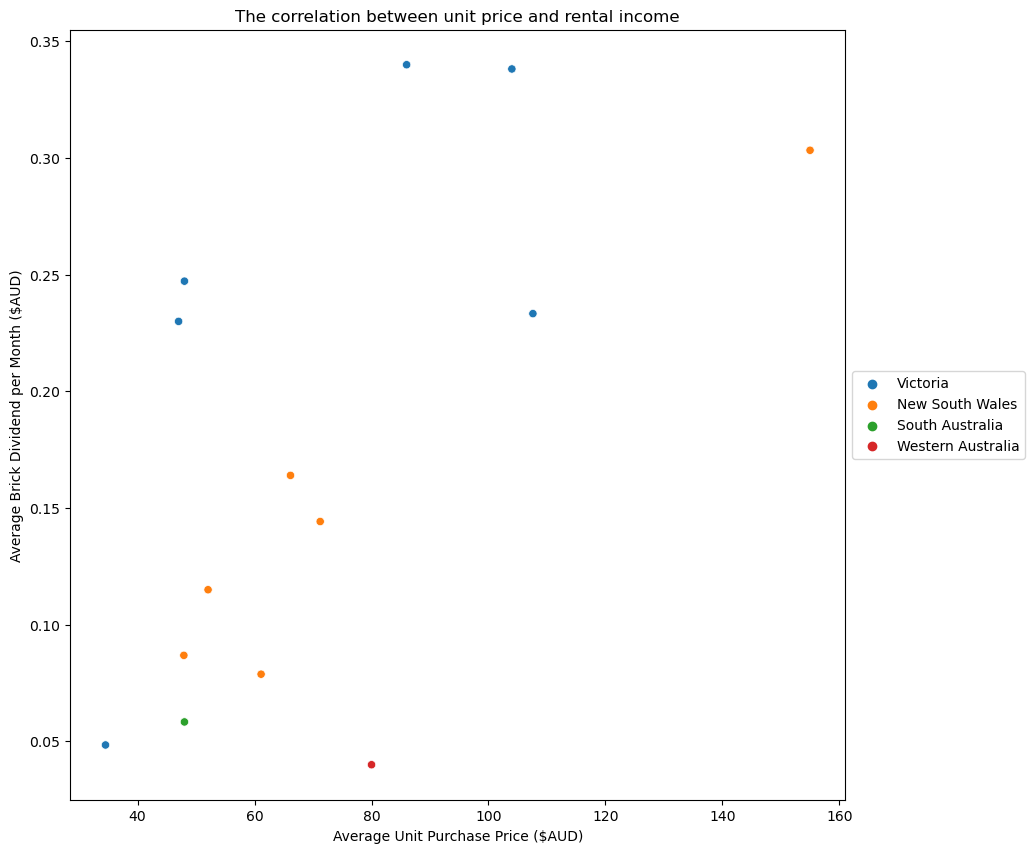

In [34]:
plt.figure(figsize = (10, 10))
# Plot a scatterplot of total_purchases vs. income
sns.scatterplot(x = 'avg_purchase_price', y = 'dividend_per_brick_month', data = corr_d_p, hue = corr_d_p['state'])
plt.title("The correlation between unit price and rental income")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Average Unit Purchase Price ($AUD)')
plt.ylabel('Average Brick Dividend per Month ($AUD)')
plt.show()
plt.close()

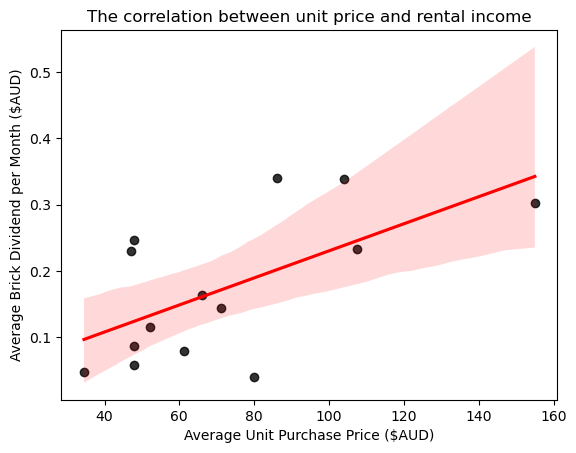

In [35]:
plt.figure()

# Plot a regression line on the scatter plot.
sns.regplot(x = corr_d_p['avg_purchase_price'], y = corr_d_p['dividend_per_brick_month'], scatter_kws ={'color':'black'}, line_kws={'color':'red'})
plt.title("The correlation between unit price and rental income")
plt.xlabel('Average Unit Purchase Price ($AUD)')
plt.ylabel('Average Brick Dividend per Month ($AUD)')
plt.show()

The overall relationship between `average unit purchase price` and `average brick dividend per month` is weak but linear. 

# Conclusion

+ What is the distribution of investments into each state for this portfolio?
This portfolio has invested in four states, New South Wales, Victoria, South Australia and Western Australia. Whilst majority of the money was invested in properties in New South Wales, the portfolio did diversify this investment into multiple properties.

+ How much rental income was collected from each property?
The top 3 properties that has provided the highest rental income CLN02, ENM01 and TAR01.

+ Which property has provided the highest rental yield?
The top 3 properties in terms of rental yield were all from Victoria in the following order CLN02 (6.18%), TAR01 (5.87%) and SOM01(4.74%).


+ Is there a correlation between average brick (unit) price and the average monthly dividend?
There was a weak correlation between the average brick price and the average monthly dividend provided by this brick unit.

From this point, I went to tableau to further visualise this data:

https://public.tableau.com/app/profile/eric.wong8260/viz/BrickxAnalysis/Dashboard1